In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
social_ad=pd.read_csv('Social_Network_Ads.csv')
social_ad.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
social_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
social_ad["User ID"].nunique()

400

In [8]:
social_ad.drop('User ID',axis=1, inplace =True)

In [9]:
social_ad.groupby("Gender").describe().T

Gender                        Female           Male
Age             count     204.000000     196.000000
                mean       38.411765      36.867347
                std        10.859019      10.043636
                min        18.000000      18.000000
                25%        30.000000      29.000000
                50%        37.500000      36.500000
                75%        47.000000      42.000000
                max        60.000000      60.000000
EstimatedSalary count     204.000000     196.000000
                mean    71759.803922   67642.857143
                std     35595.236189   32421.819181
                min     15000.000000   15000.000000
                25%     44000.000000   43000.000000
                50%     70500.000000   68000.000000
                75%     90750.000000   86000.000000
                max    150000.000000  150000.000000
Purchased       count     204.000000     196.000000
                mean        0.377451       0.336735
                std         0.485942       0.473804
                min         0.000000       0.000000
                25%         0.000000       0.000000
                50%         0.000000       0.000000
                75%         1.000000       1.000000
                max         1.000000       1.000000

In [10]:
social_ad.groupby(['Gender','Purchased']).describe().T

Gender                        Female                          Male  \
Purchased                          0              1              0   
Age             count     127.000000      77.000000     130.000000   
                mean       33.110236      47.155844      32.484615   
                std         8.468643       8.463645       7.504246   
                min        18.000000      27.000000      18.000000   
                25%        27.000000      42.000000      26.000000   
                50%        33.000000      48.000000      34.500000   
                75%        39.000000      53.000000      38.000000   
                max        59.000000      60.000000      49.000000   
EstimatedSalary count     127.000000      77.000000     130.000000   
                mean    61480.314961   88714.285714   59630.769231   
                std     25248.243816   43123.097103   23504.292355   
                min     15000.000000   20000.000000   15000.000000   
                25%     44000.000000   41000.000000   43500.000000   
                50%     62000.000000   96000.000000   60500.000000   
                75%     79000.000000  130000.000000   76750.000000   
                max    134000.000000  150000.000000  141000.000000   

Gender                                
Purchased                          1  
Age             count      66.000000  
                mean       45.500000  
                std         8.762244  
                min        28.000000  
                25%        39.000000  
                50%        46.000000  
                75%        50.500000  
                max        60.000000  
EstimatedSalary count      66.000000  
                mean    83424.242424  
                std     40937.122745  
                min     20000.000000  
                25%     41250.000000  
                50%     87500.000000  
                75%    117750.000000  
                max    150000.000000

In [11]:
social_ad['Male']=pd.get_dummies(social_ad['Gender'],drop_first=True)
social_ad.drop('Gender',axis=1, inplace = True)

In [12]:
social_ad.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


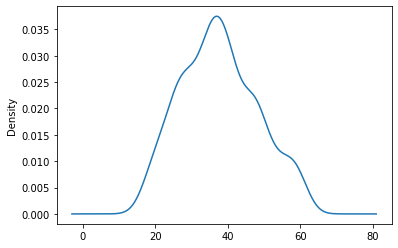

In [16]:
social_ad['Age'].plot.kde()

(array([19.,  9., 15., 22., 25., 21., 20., 15., 44., 33., 46., 19.,  9.,
        26., 24.,  7., 11.,  7.,  8., 20.]),
 array([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ,
        41.1, 43.2, 45.3, 47.4, 49.5, 51.6, 53.7, 55.8, 57.9, 60. ]),
 <a list of 20 Patch objects>)

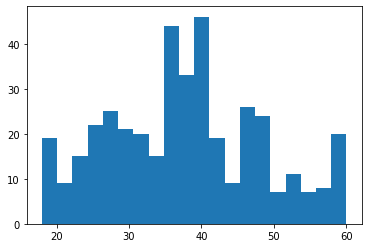

In [17]:
plt.hist(social_ad["Age"],bins=20)


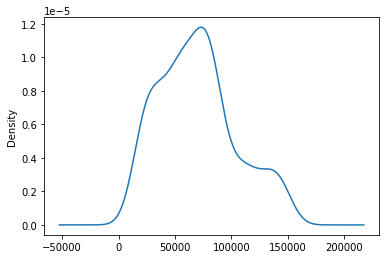

In [18]:
social_ad['EstimatedSalary'].plot.kde()

Text(0, 0.5, 'Count')

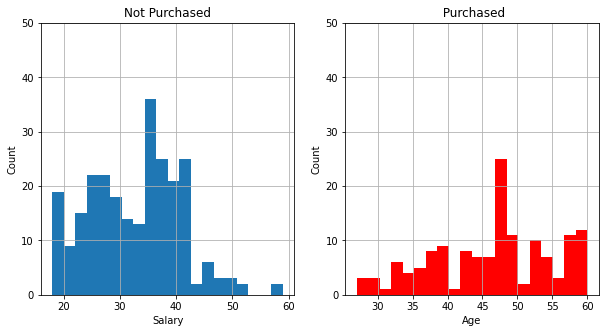

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
p= plt.hist(social_ad[social_ad['Purchased']==0]["Age"],bins=20)
plt.grid()
plt.ylim([0,50])
plt.title('Not Purchased')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.subplot(1,2,2)
p= plt.hist(social_ad[social_ad['Purchased']==1]["Age"],bins=20,color='r')
plt.grid()
plt.ylim([0,50])
plt.title(' Purchased')
plt.xlabel('Age')
plt.ylabel('Count')

In [26]:
x=social_ad.drop('Purchased',axis=1)
y=social_ad['Purchased']

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25, random_state=10)

In [30]:
model_dt=DecisionTreeClassifier().fit(xtrain,ytrain)

In [31]:
model_dt.score(xtest,ytest)

0.91

In [32]:
model_rf=RandomForestClassifier().fit(xtrain,ytrain)

In [33]:
model_rf.score(xtest,ytest)

0.93

In [34]:
model_dt.classes_

array([0, 1], dtype=int64)

In [40]:
imp_dt=pd.DataFrame(model_dt.feature_importances_*100,index=x.columns, columns=['Features Importance'])

In [41]:
imp_dt

,Features Importance
Age,51.394988
EstimatedSalary,45.914397
Male,2.690615


In [82]:
imp_dt.sum()

Features Importance    100.0
dtype: float64

In [83]:
x2=x.drop('Male',axis=1).copy()
y2=y.copy()
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.2,random_state=10)
model_dt_2=DecisionTreeClassifier().fit(xtrain2,ytrain2)
print(round(model_dt_2.score(xtest2,ytest2)*100,2))

86.25


In [84]:
model_dt_2.feature_importances_

array([0.5275455, 0.4724545])

In [85]:
model_rf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [86]:
model_rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=83188528),
 DecisionTreeClassifier(max_features='auto', random_state=25515195),
 DecisionTreeClassifier(max_features='auto', random_state=1181483550),
 DecisionTreeClassifier(max_features='auto', random_state=1961207980),
 DecisionTreeClassifier(max_features='auto', random_state=138628060),
 DecisionTreeClassifier(max_features='auto', random_state=684010607),
 DecisionTreeClassifier(max_features='auto', random_state=745878572),
 DecisionTreeClassifier(max_features='auto', random_state=705462316),
 DecisionTreeClassifier(max_features='auto', random_state=1591438600),
 DecisionTreeClassifier(max_features='auto', random_state=1719509473),
 DecisionTreeClassifier(max_features='auto', random_state=812802901),
 DecisionTreeClassifier(max_features='auto', random_state=922924682),
 DecisionTreeClassifier(max_features='auto', random_state=432911609),
 DecisionTreeClassifier(max_features='auto', random_state=1486850008),
 DecisionTreeClas

In [87]:
model_rf.feature_importances_*100


array([52.92217341, 46.21813189,  0.8596947 ])

In [88]:
model_rf2=RandomForestClassifier().fit(xtrain2,ytrain2)

In [89]:
print(model_rf2.score(xtest2,ytest2)*100)
model_rf2.feature_importances_

90.0


array([0.53762019, 0.46237981])

In [90]:
model_dt_3=DecisionTreeClassifier(criterion='entropy').fit(xtrain2,ytrain2)
model_dt_3.score(xtest2,ytest2)*100

85.0

In [91]:
scores=[]
for i in range(5,201,5):
    model_rf3=RandomForestClassifier(n_estimators=i).fit(xtrain2,ytrain2)
    scores.append(round(model_rf3.score(xtest2,ytest2)*100,2))


([<matplotlib.axis.XTick at 0x1a3fcc74cf8>,
 <a list of 40 Text major ticklabel objects>)

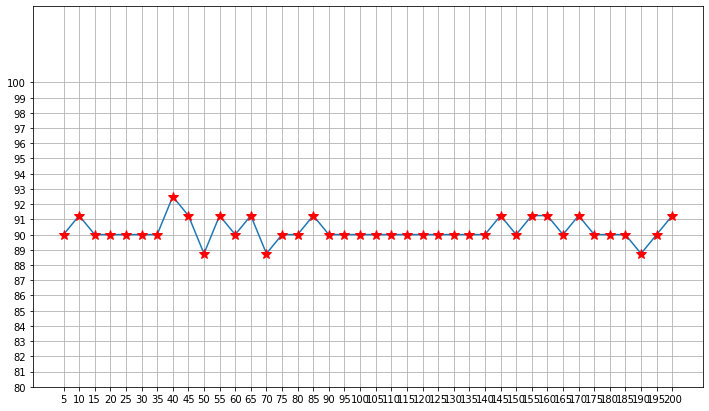

In [92]:
plt.figure(figsize=(12,7))
plt.plot(range(5,201,5),scores,marker='*',markersize=10,markerfacecolor='r',markeredgecolor='r')
plt.grid()
plt.ylim([80,105])
plt.yticks(range(80,101,1))
plt.xticks(range(5,201,5))

## 

In [93]:
criterions=['gini','entropy']
n_est=list(range(5,201,5))
min_splits=[2,4,6,8,10,14,18,20]
params ={'n_estimators':n_est,'criterion':criterions,'min_sample_split':min_splits}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
g_model=GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=3)
g_model.fit(xtrain2,ytrain2)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] criterion=gini, min_sample_split=2, n_estimators=5 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter min_sample_split for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.